In [1]:
import numpy as np
from scipy import ndimage as ndi
import matplotlib.pyplot as plt


In [2]:
# Set up test cases
x = y = np.linspace(-1,1,101)
yy, xx = np.meshgrid(y, x, indexing="ij")

z_peak = -xx**2-yy**2+1
z_pit = -z_peak
z_ridge = 1-2*xx**2
z_trough = -z_ridge
z_saddle = xx**2-yy**2


In [148]:
gradient = np.stack(np.gradient(z_pit, axis=(-2,-1)), axis=-1)
gradient.shape

(101, 101, 2)

In [149]:
gradient[0,0]

array([-0.0396, -0.0396])

In [150]:
hessian = np.stack(np.gradient(gradient, axis=(-3,-2)), axis=-2)
hessian.shape

(101, 101, 2, 2)

In [151]:
hessian[0,0]

array([[0.0004, 0.    ],
       [0.    , 0.0004]])

In [152]:
offset = np.einsum("...ij,...i->...j", np.linalg.inv(hessian+1e-15*np.eye(2)), gradient)

In [153]:
np.sum(offset*gradient > 0, -1)[50,40:60]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [163]:
offset * np.array([1,2])

array([[[ -99.        , -198.        ],
        [ -99.        , -130.66666667],
        [ -99.        ,  -96.        ],
        ...,
        [ -99.        ,   96.        ],
        [ -99.        ,  130.66666667],
        [ -99.        ,  198.        ]],

       [[ -65.33333333, -198.        ],
        [ -65.33333333, -130.66666667],
        [ -65.33333333,  -96.        ],
        ...,
        [ -65.33333333,   96.        ],
        [ -65.33333333,  130.66666667],
        [ -65.33333333,  198.        ]],

       [[ -48.        , -198.        ],
        [ -48.        , -130.66666667],
        [ -48.        ,  -96.        ],
        ...,
        [ -48.        ,   96.        ],
        [ -48.        ,  130.66666667],
        [ -48.        ,  198.        ]],

       ...,

       [[  48.        , -198.        ],
        [  48.        , -130.66666667],
        [  48.        ,  -96.        ],
        ...,
        [  48.        ,   96.        ],
        [  48.        ,  130.66666667],
        [

In [164]:
offset.shape

(101, 101, 2)

In [154]:
(offset*gradient)[50,40:60]

array([[0.    , 0.08  ],
       [0.    , 0.0648],
       [0.    , 0.0512],
       [0.    , 0.0392],
       [0.    , 0.0288],
       [0.    , 0.02  ],
       [0.    , 0.0128],
       [0.    , 0.0072],
       [0.    , 0.0032],
       [0.    , 0.0008],
       [0.    , 0.    ],
       [0.    , 0.0008],
       [0.    , 0.0032],
       [0.    , 0.0072],
       [0.    , 0.0128],
       [0.    , 0.02  ],
       [0.    , 0.0288],
       [0.    , 0.0392],
       [0.    , 0.0512],
       [0.    , 0.0648]])

In [165]:
def get_newton_distance(z, feature_type=None, distances=(1,1)):
    gradient = np.stack(np.gradient(z, axis=(-2,-1)), axis=-1)
    hessian = np.stack(np.gradient(gradient, axis=(-3,-2)), axis=-2)
    offset = np.einsum("...ij,...i->...j", np.linalg.inv(hessian+1e-15*np.eye(2)), gradient)
    distance = np.sum((offset*np.asarray(distances))**2, axis=-1)**0.5
    feature_mask = np.sum(offset*gradient > 0, -1)
    
    if feature_type is not None:
        if feature_type == "maxima":
            distance[feature_mask!=0] = np.nan
        elif feature_type == "minima":
            distance[feature_mask!=2] = np.nan
        elif feature_type == "saddle":
            distance[feature_mask!=1] = np.nan
        else:
            raise ValueError("feature_type parameter must be either 'maxima', 'minima', 'saddle' or None")
    return distance

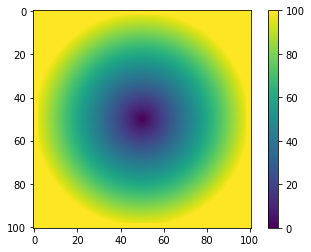

In [168]:
plt.imshow(get_newton_distance(z_peak, feature_type="maxima", distances=(2,2)),vmax=100)
plt.colorbar()

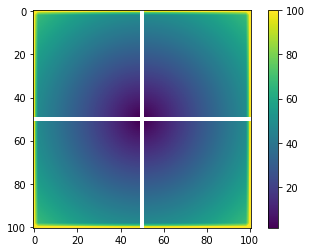

In [162]:
plt.imshow(get_newton_distance(z_pit, feature_type="minima"),vmax=100)
plt.colorbar()

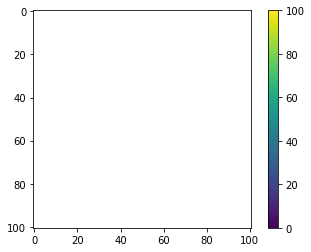

In [125]:
plt.imshow(get_newton_distance(z_trough, feature_type="saddle"),vmax=100)
plt.colorbar()

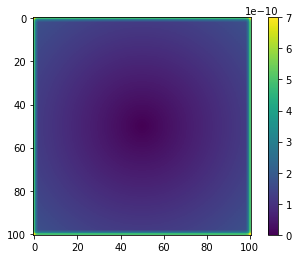

In [76]:
plt.imshow(get_newton_distance(z_peak)-get_newton_distance(z_pit))
plt.colorbar()